In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
import warnings
from datetime import datetime
import missingno as msno
from cycler import cycler
import matplotlib.ticker as ticker
import matplotlib.transforms as mtransforms

warnings.filterwarnings("ignore")

import matplotlib as mpl

mpl.rcParams["lines.linewidth"] = 2
sns.set_style("ticks")

plt.rcParams.update(
    {
        "axes.titlesize": 24,
        "axes.labelpad": 10,
        "axes.labelcolor": "dimgray",
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 20,
        "font.family": "serif",
        "grid.linestyle": "--",
        "grid.linewidth": 0.5,
        "grid.color": "gray",
        "axes.grid": True,
        "axes.grid.which": "both",
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.major.size": 6,
        "xtick.major.width": 2,
        "ytick.major.size": 6,
        "ytick.major.width": 2,
        "xtick.color": "gray",
        "ytick.color": "gray",
    }
)

In [7]:
def build_combined_df(dems):
    combined_df = pd.DataFrame()
    for dem_year in dems:
        temp_df = pd.read_csv(
            f"Results/DuneFeatures_Width_Height_Slope/Data/duneCharacteristics_{dem_year.replace(' ', '_')}.csv"
        )
        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
    combined_df.rename(
        columns={
            "islandWidth": "Island Width (m)",
            "alongshore": "Alongshore Distances (m)",
            "maxElevation": "Max Elevation (m)",
            "primaryDuneHeight": "Primary Dune Height (m)",
            "maxDuneSlope": "Max Dune Slope",
        },
        inplace=True,
    )
    combined_df["DEM"] = combined_df["DEM"].map(dem_date_map)

    return combined_df

In [8]:
dems = (
    "DEM 2001",
    "DEM 2002",
    "DEM 2009",
    "DEM 2018",
    "DEM 2018_19_post_harvey",
)


dem_date_map = {
    "DEM 2001": "10/13/01",
    "DEM 2002": "9/18/02",
    "DEM 2009": "3/15/09",
    "DEM 2018": "2/16/18",
    "DEM 2018_19_post_harvey": "2/9/19",
}

for dem, date_str in dem_date_map.items():
    date_obj = datetime.strptime(date_str, "%m/%d/%y")
    dem_date_map[dem] = date_obj.strftime("%b %Y")

dem_date_map


island_df = build_combined_df(dems)

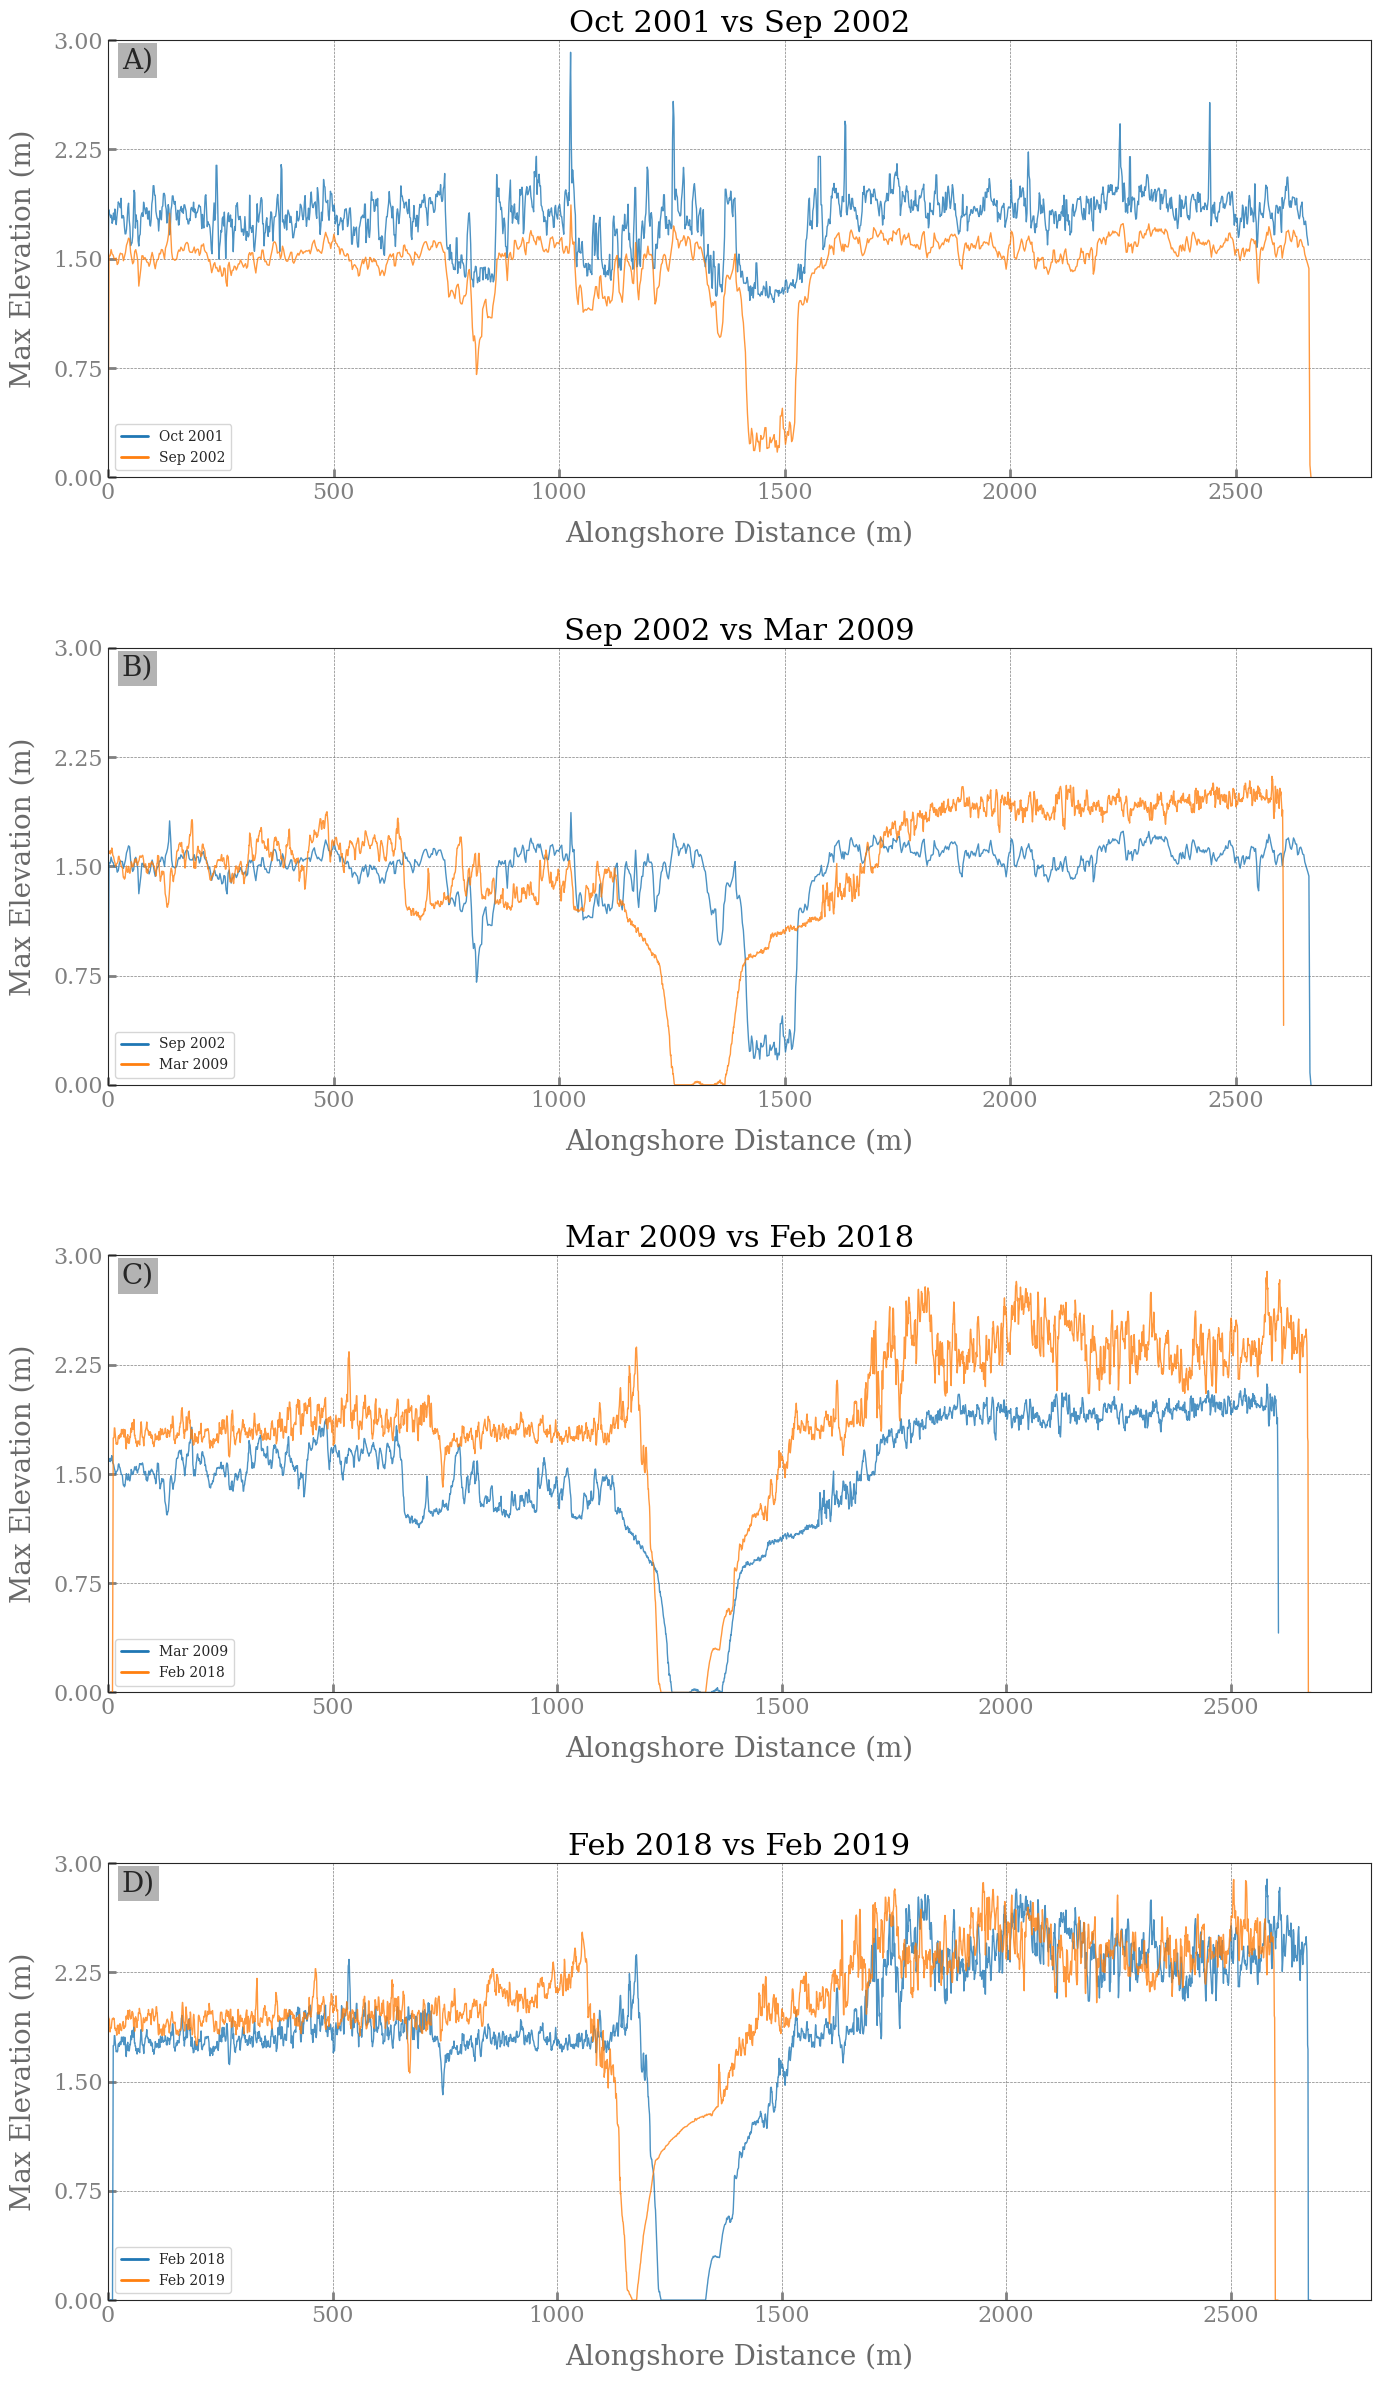

In [9]:
island_parameters = [
    "Max Elevation (m)",
]

labels = ["A)", "B)", "C)", "D)", "E)"]

dem_pairs = [
    ("Oct 2001", "Sep 2002"),
    ("Sep 2002", "Mar 2009"),
    ("Mar 2009", "Feb 2018"),
    ("Feb 2018", "Feb 2019"),
]

for parameter in island_parameters:
    fig, axes = plt.subplots(len(dem_pairs), 1, figsize=(15, 25))
    
    for ax, (dem1, dem2), label in zip(axes, dem_pairs, labels):
        sns.lineplot(
            data=island_df[island_df["DEM"].isin([dem1, dem2])],
            x="Alongshore Distances (m)",
            y=parameter,
            hue="DEM",
            ax=ax,
            linewidth=1,
            alpha=0.8
        )
        ax.set_title(f"{dem1} vs {dem2}", size=22, color="k")
        ax.set_xlabel("Alongshore Distance (m)", labelpad=12)
        ax.set_ylabel(parameter, labelpad=12)
        
        ylim = (0, 3)
        num_ticks = 5
        ticks = np.linspace(ylim[0], ylim[1], num_ticks)
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(ticker.FixedLocator(ticks))
        ax.set_xlim(left=0)

        trans = mtransforms.ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
        ax.text(
            0.0,
            1.0,
            label,
            transform=ax.transAxes + trans,
            fontsize="20",
            verticalalignment="top",
            fontfamily="serif",
            bbox=dict(facecolor="0.7", edgecolor="none", pad=3.0),
        )

        ax.legend(loc='lower left')  # Add this line to place the legend in the bottom left corner

    plt.tight_layout(pad=5)
    plt.show()
